In [1]:
# Moving Averages Code
# Load the necessary packages and modules
import pandas as pd
import pandas.io.data as web
#import matplotlib.pyplot as plt
# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(pd.rolling_mean(data['Close'], ndays), name = 'SMA') 
    data = data.join(SMA) 
    return data
# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(pd.ewma(data['Close'], span = ndays, min_periods = ndays - 1), 
    name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data
# Retrieve the Nifty data from Yahoo finance:
data = web.DataReader('^NSEI',data_source='yahoo',start='1/1/2013', end='1/1/2016')
data = pd.DataFrame(data) 
close = data['Close']
# Compute the 50-day SMA for NIFTY
n = 50
SMA_NIFTY = SMA(data,n)
SMA_NIFTY = SMA_NIFTY.dropna()
SMA = SMA_NIFTY['SMA']
# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_NIFTY = EWMA(data,ew)
EWMA_NIFTY = EWMA_NIFTY.dropna()
EWMA = EWMA_NIFTY['EWMA_200']
# Plotting the NIFTY Price Series chart and Moving Averages below



/opt/conda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
EWMA

Date
2013-10-09    5799.776717
2013-10-10    5802.321895
2013-10-11    5805.698473
2013-10-14    5809.220413
2013-10-15    5812.425753
2013-10-17    5815.095524
2013-10-18    5819.369673
2013-10-21    5823.766705
2013-10-22    5828.082799
2013-10-23    5832.065610
2013-10-24    5835.838584
2013-10-25    5839.342945
2013-10-28    5842.306822
2013-10-29    5846.587755
2013-10-30    5851.162347
2013-10-31    5856.214313
2013-11-01    5861.293351
2013-11-05    5865.700689
2013-11-06    5869.625966
2013-11-07    5873.189189
2013-11-08    5876.186983
2013-11-11    5878.454246
2013-11-12    5880.014404
2013-11-13    5881.237664
2013-11-14    5883.187772
2013-11-18    5886.593211
2013-11-19    5890.116350
2013-11-20    5892.702461
2013-11-21    5893.882560
2013-11-22    5895.008329
                 ...     
2015-11-18    8150.144007
2015-11-19    8147.082909
2015-11-20    8144.189739
2015-11-23    8141.252710
2015-11-24    8138.169194
2015-11-26    8135.636207
2015-11-27    8133.714982
2015-11

[None, None, None, None, None, None, None, None]

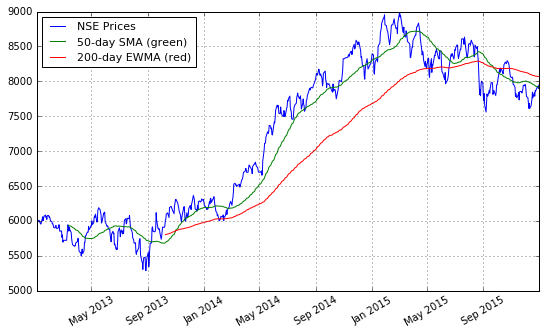

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(data['Close'],lw=1, label='NSE Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

[None, None, None, None, None, None]

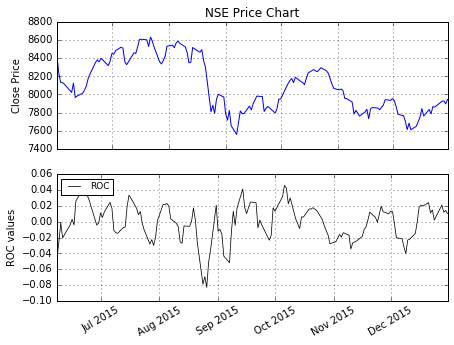

In [6]:
# Rate of Change code
# Load the necessary packages and modules
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
# Rate of Change (ROC)
def ROC(data,n):
    N = data['Close'].diff(n)
    D = data['Close'].shift(n)
    ROC = pd.Series(N/D,name='Rate of Change')
    data = data.join(ROC)
    return data 
# Retrieve the NIFTY data from Yahoo finance:
data = web.DataReader('^NSEI',data_source='yahoo',start='6/1/2015',end='1/1/2016')
data = pd.DataFrame(data)
# Compute the 5-period Rate of Change for NIFTY
n = 5
NIFTY_ROC = ROC(data,n)
ROC = NIFTY_ROC['Rate of Change']
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [8]:
################ Bollinger Bands #############################
# Load the necessary packages and modules
import pandas as pd
import pandas.io.data as web
# Compute the Bollinger Bands 
def BBANDS(data, ndays):
    MA = pd.Series(pd.rolling_mean(data['Close'], ndays)) 
    SD = pd.Series(pd.rolling_std(data['Close'], ndays))
    b1 = MA + (2 * SD)
    B1 = pd.Series(b1, name = 'Upper BollingerBand') 
    data = data.join(B1) 
    b2 = MA - (2 * SD)
    B2 = pd.Series(b2, name = 'Lower BollingerBand') 
    data = data.join(B2) 
    return data
# Retrieve the Nifty data from Yahoo finance:
data = web.DataReader('^NSEI',data_source='yahoo',start='1/1/2010', end='1/1/2016')
data = pd.DataFrame(data)
# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
n = 50
NIFTY_BBANDS = BBANDS(data, n)
print(NIFTY_BBANDS)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195       0   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902       0   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805       0   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098       0   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000       0   
2010-01-11  5263.799805  5287.200195  5227.799805  5249.399902       0   
2010-01-12  5251.100098  5300.500000  5200.950195  5210.399902       0   
2010-01-13  5212.600098  5239.200195  5169.549805  5233.950195       0   
2010-01-14  5234.500000  5272.850098  5232.500000  5259.899902       0   
2010-01-15  5259.899902  5279.850098  5242.450195  5252.200195       0   
2010-01-18  5253.649902  5292.500000  5228.950195  5274.850098       0   
2010-01-19  5274.200195  5287.799805  

In [10]:
################# Force Index ########################################################
# Load the necessary packages and modules
import pandas as pd
import pandas.io.data as web
# Force Index 
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    return data
# Retrieve the Apple data from Yahoo finance:
data = web.DataReader('AAPL',data_source='yahoo',start='1/1/2010', end='1/1/2016')
data = pd.DataFrame(data)
# Compute the Force Index for Apple 
n = 1
AAPL_ForceIndex = ForceIndex(data,n)
print(AAPL_ForceIndex)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-01-04  213.429998  214.499996  212.380001  214.009998  123432400   
2010-01-05  214.599998  215.589994  213.249994  214.379993  150476200   
2010-01-06  214.379993  215.230000  210.750004  210.969995  138040000   
2010-01-07  211.750000  212.000006  209.050005  210.580000  119282800   
2010-01-08  210.299994  212.000006  209.060005  211.980005  111902700   
2010-01-11  212.799997  213.000002  208.450005  210.110003  115557400   
2010-01-12  209.189995  209.769995  206.419998  207.720001  148614900   
2010-01-13  207.870005  210.929995  204.099998  210.650002  151473000   
2010-01-14  210.110003  210.459997  209.020004  209.430000  108223500   
2010-01-15  210.929995  211.599997  205.869999  205.930000  148516900   
2010-01-19  208.330002  215.189999  207.240004  215.039995  182501900   
2010-01-20  214.910006  215.549994  209.500002  211

In [12]:
plt.savefig("cci.png")
plt.show()

In [14]:
!ls -lht

total 148K
-rw-r--r-- 1 root root 1.2K Jul 29 10:27 cci.png
-rw-r--r-- 1 root root 132K Jul 29 10:27 Untitled.ipynb
-rw-r--r-- 1 root root  11K Mar  1 10:23 easyboto.py
